In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize wandb API
api = wandb.Api()

# Get runs from your PixelNerf project
project = "sequoia-bat/PixelNerf"
runs = api.runs(project)

print(f"Found {len(runs)} runs in the project")

# Extract data from runs
data = []
for run in runs:
    # Get run configuration (hyperparameters)
    config = run.config

    # Get run summary (final metrics)
    summary = run.summary

    # Create a row for this run
    row = {
        "run_id": run.id,
        "run_name": run.name,
        "state": run.state,
        "created_at": run.created_at,
    }

    # Add config parameters
    for key, value in config.items():
        row[f"config_{key}"] = value

    # Add summary metrics
    for key, value in summary.items():
        if isinstance(value, (int, float)):  # Only numeric values
            row[f"metric_{key}"] = value

    data.append(row)

# Convert to DataFrame
df = pd.DataFrame(data)

print(f"DataFrame shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Display first few rows
df.head(100)

Found 19 runs in the project
DataFrame shape: (19, 34)
Columns: ['run_id', 'run_name', 'state', 'created_at', 'config_data', 'config_loss', 'config_model', 'config_train', 'config_renderer', 'metric__runtime', 'metric__step', 'metric__timestamp', 'metric_alpha_reg', 'metric_alpha_sparse_c', 'metric_alpha_sparse_f', 'metric_c_alpha_max', 'metric_c_alpha_min', 'metric_c_rgb_max', 'metric_c_rgb_min', 'metric_f_alpha_max', 'metric_f_alpha_min', 'metric_f_rgb_max', 'metric_f_rgb_min', 'metric_psnr', 'metric_rc', 'metric_rf', 'metric_t', 'metric_val_alpha_reg', 'metric_val_alpha_sparse_c', 'metric_val_alpha_sparse_f', 'metric_val_rc', 'metric_val_rf', 'metric_val_t', 'metric_lr']


,run_id,run_name,state,created_at,config_data,config_loss,config_model,config_train,config_renderer,metric__runtime,...,metric_rc,metric_rf,metric_t,metric_val_alpha_reg,metric_val_alpha_sparse_c,metric_val_alpha_sparse_f,metric_val_rc,metric_val_rf,metric_val_t,metric_lr
0,vobq6rqk,pollen_augmentation2,crashed,2025-06-01T12:41:41Z,{'format': 'srn'},"{'rgb': {'use_l1': False}, 'alpha': {'init_epo...","{'code': {'num_freqs': 6, 'freq_factor': 1.5, ...","{'accu_grad': 1, 'vis_interval': 144, 'eval_in...","{'sched': [], 'n_fine': 64, 'n_coarse': 128, '...",341047.863694,...,0.002849,0.002662,0.009546,0.001798,0.089967,0.089848,0.000665,0.000634,0.003097,NaN
1,eykqxcvs,pollen_none_pretrained,crashed,2025-06-04T14:42:18Z,{'format': 'srn'},"{'rgb': {'use_l1': True}, 'alpha': {'init_epoc...","{'code': {'num_freqs': 8, 'freq_factor': 1.5, ...","{'accu_grad': 1, 'vis_interval': 144, 'eval_in...","{'sched': [], 'n_fine': 32, 'n_coarse': 64, 'd...",362901.949699,...,0.044915,0.045815,0.105647,0.005520,0.262319,0.193153,0.020107,0.019573,0.045200,1.925696e-06
2,4c073lem,pollen_l1,crashed,2025-06-04T17:39:02Z,{'format': 'srn'},"{'rgb': {'use_l1': True}, 'alpha': {'init_epoc...","{'code': {'num_freqs': 6, 'freq_factor': 1.5, ...","{'accu_grad': 1, 'vis_interval': 144, 'eval_in...","{'sched': [], 'n_fine': 32, 'n_coarse': 64, 'd...",322711.018964,...,0.038267,0.040550,0.092564,0.005605,0.318770,0.161179,0.009518,0.009687,0.024810,3.399175e-07
3,vipqvh5l,pollen_softplus,crashed,2025-06-08T11:19:50Z,{'format': 'srn'},"{'rgb': {'use_l1': False}, 'alpha': {'init_epo...","{'code': {'num_freqs': 6, 'freq_factor': 1.5, ...","{'accu_grad': 1, 'vis_interval': 144, 'eval_in...","{'sched': [], 'n_fine': 32, 'n_coarse': 64, 'd...",559729.056328,...,0.005486,0.005457,0.015514,0.001738,0.070357,0.068976,0.001817,0.001768,0.005324,2.310738e-07
4,z1pjgeol,pollen_augmentation_no_global,crashed,2025-06-08T13:07:23Z,{'format': 'srn'},"{'rgb': {'use_l1': False}, 'alpha': {'init_epo...","{'code': {'num_freqs': 6, 'freq_factor': 1.5, ...","{'accu_grad': 1, 'vis_interval': 144, 'eval_in...","{'sched': [], 'n_fine': 64, 'n_coarse': 128, '...",604765.886568,...,0.005285,0.005414,0.015893,0.001850,0.074348,0.073746,0.001379,0.001613,0.004842,8.647077e-06
5,nh3t8e48,pollen_augmentation6,crashed,2025-06-08T13:49:32Z,{'format': 'srn'},"{'rgb': {'use_l1': False}, 'alpha': {'init_epo...","{'code': {'num_freqs': 6, 'freq_factor': 1.5, ...","{'accu_grad': 1, 'vis_interval': 144, 'eval_in...","{'sched': [], 'n_fine': 64, 'n_coarse': 128, '...",550711.147051,...,0.001118,0.001046,0.003681,0.002018,0.081461,0.080208,0.001624,0.001438,0.005080,8.142285e-06
6,1qzpuj44,pollen_augmentation4,crashed,2025-06-09T10:48:06Z,{'format': 'srn'},"{'rgb': {'use_l1': False}, 'alpha': {'init_epo...","{'code': {'num_freqs': 6, 'freq_factor': 1.5, ...","{'accu_grad': 1, 'vis_interval': 144, 'eval_in...","{'sched': [], 'n_fine': 64, 'n_coarse': 128, '...",475178.589390,...,0.002286,0.002325,0.006405,0.001666,0.066085,0.067040,0.000730,0.000681,0.003077,1.352760e-06
7,8sr30kpi,pollen_augmentation1,crashed,2025-06-14T22:58:24Z,{'format': 'srn'},"{'rgb': {'use_l1': False}, 'alpha': {'init_epo...","{'code': {'num_freqs': 6, 'freq_factor': 1.5, ...","{'accu_grad': 1, 'vis_interval': 144, 'eval_in...","{'sched': [], 'n_fine': 64, 'n_coarse': 128, '...",427270.290535,...,0.002123,0.001991,0.005508,0.001757,0.072216,0.068990,0.002659,0.002861,0.007277,1.101831e-06
8,r1s5mfu0,pollen_more_fine_coarse,crashed,2025-06-14T23:13:08Z,{'format': 'srn'},"{'rgb': {'use_l1': False}, 'alpha': {'init_epo...","{'code': {'num_freqs': 6, 'freq_factor': 1.5, ...","{'accu_grad': 1, 'vis_interval': 144, 'eval_in...","{'sched': [], 'n_fine': 64, 'n_coarse': 128, '...",386968.221873,...,0.002463,0.002495,0.009700,0.002297,0.092329,0.091586,0.001796,0.001820,0.005912,1.825726e-07
9,yeg9cl0o,pollen_128,crashed,2025-06-15T16:37:45Z,{'format': 'srn'},"{'rgb': {'use_l1': False}, 'alpha': {'init_epo...","{'code': {'num_freqs': 6,

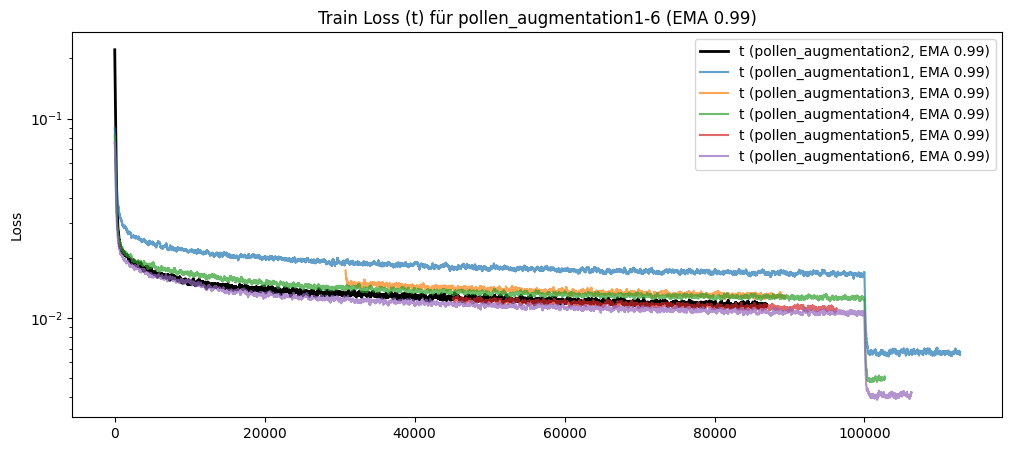

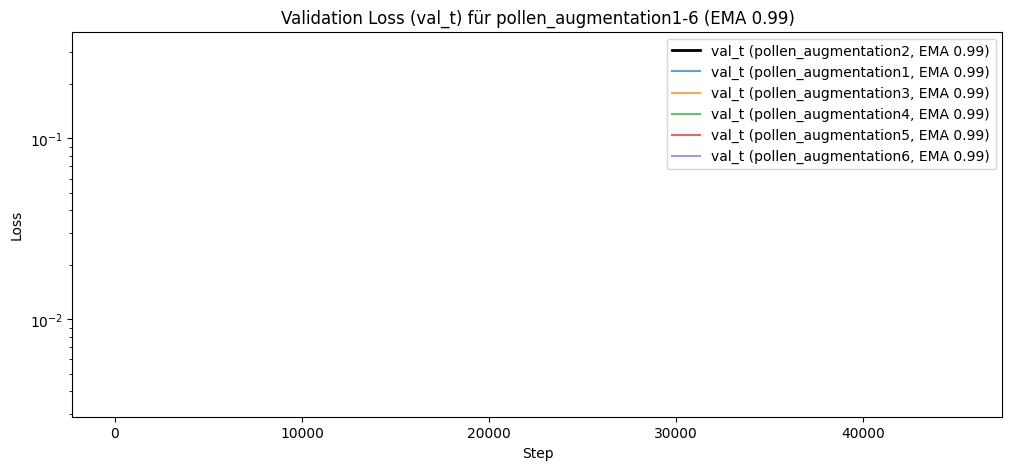

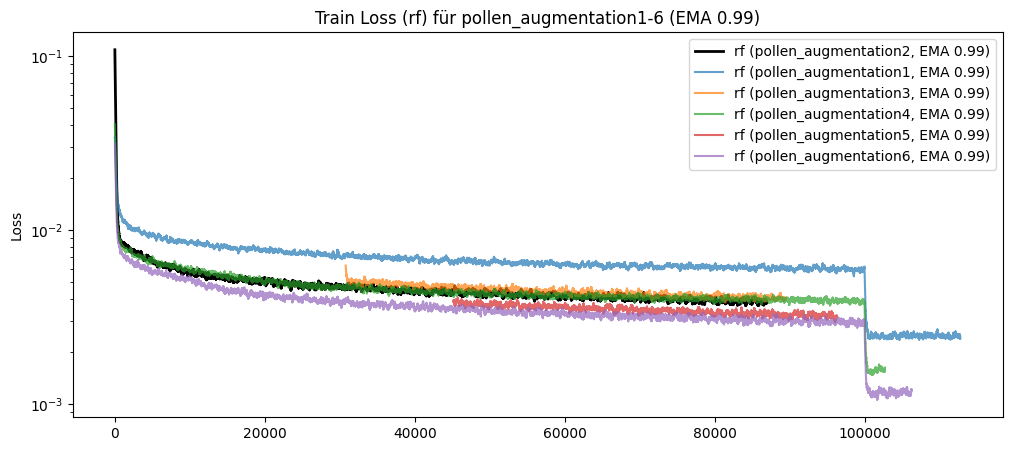

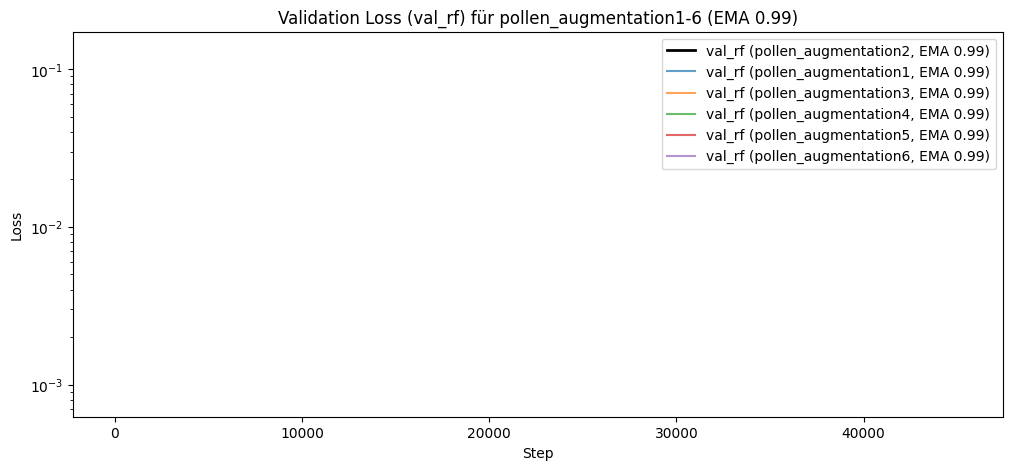

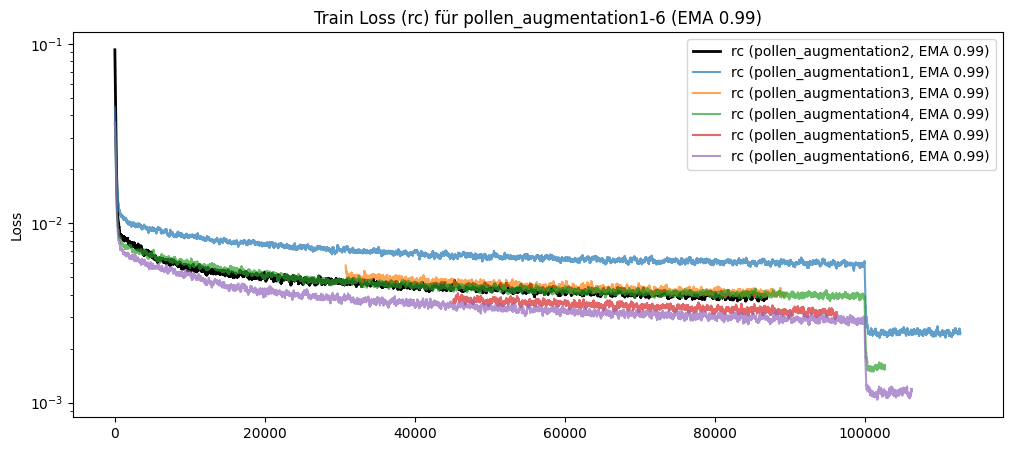

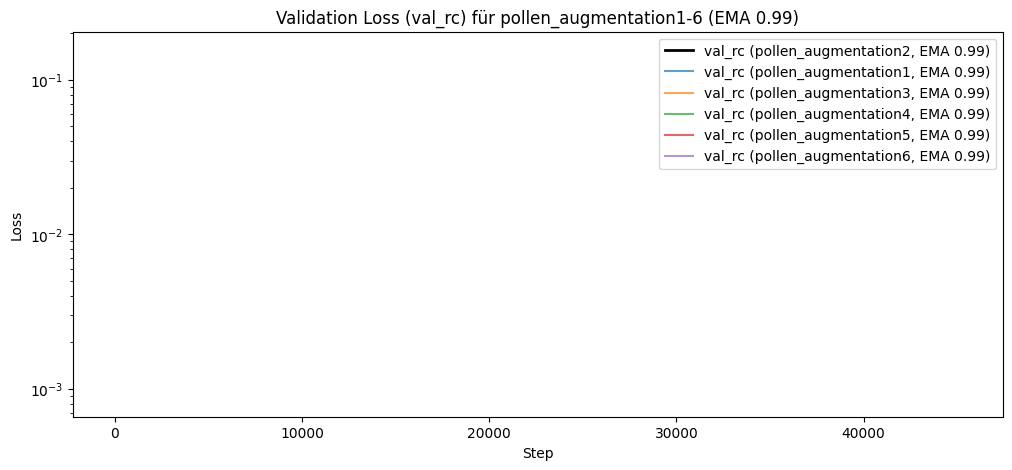

In [2]:
# Time-weighted EMA smoothing
def smooth_curve_ema(values, alpha=0.99):
    smoothed = []
    v = None
    for x in values:
        if v is None:
            v = x
        else:
            v = alpha * v + (1 - alpha) * x
        smoothed.append(v)
    return np.array(smoothed)


# Loss-Kurven für pollen_augmentation2 und pollen_augmentation1-6 (außer 2) anzeigen
main_run_name = "pollen_augmentation2"
compare_run_names = [f"pollen_augmentation{i}" for i in range(1, 7) if i != 2]
color_list = [
    "tab:blue",
    "tab:orange",
    "tab:green",
    "tab:red",
    "tab:purple",
    "tab:brown",
]

# Runs suchen
main_run = None
compare_runs = {}
for run in runs:
    if run.name == main_run_name:
        main_run = run
    for idx, name in enumerate(compare_run_names):
        if run.name == name:
            compare_runs[name] = run

if main_run is None:
    print(f"Run '{main_run_name}' nicht gefunden.")
else:
    history = main_run.history(samples=100000)
    # --- Plot 1: Training Loss t ---
    plt.figure(figsize=(12, 5))
    if "t" in history.columns:
        smoothed = smooth_curve_ema(history["t"].values, alpha=0.99)
        plt.plot(
            history["_step"],
            smoothed,
            label=f"t ({main_run_name}, EMA 0.99)",
            color="black",
            alpha=1.0,
            linewidth=2,
        )
    for idx, name in enumerate(compare_run_names):
        run = compare_runs.get(name)
        if run is not None:
            compare_history = run.history(samples=100000)
            if "t" in compare_history.columns:
                smoothed_compare = smooth_curve_ema(
                    compare_history["t"].values, alpha=0.99
                )
                plt.plot(
                    compare_history["_step"],
                    smoothed_compare,
                    label=f"t ({name}, EMA 0.99)",
                    color=color_list[idx],
                    alpha=0.7,
                )
    plt.ylabel("Loss")
    plt.title("Train Loss (t) für pollen_augmentation1-6 (EMA 0.99)")
    plt.yscale("log")
    plt.legend()
    plt.show()

    # --- Plot 2: Validation Loss val_t ---
    plt.figure(figsize=(12, 5))
    val_t_empty = False
    if "val_t" in history.columns and not history["val_t"].dropna().empty:
        smoothed_val = smooth_curve_ema(history["val_t"].values, alpha=0.99)
        plt.plot(
            history["_step"],
            smoothed_val,
            label=f"val_t ({main_run_name}, EMA 0.99)",
            color="black",
            linewidth=2,
        )
    else:
        val_t_empty = True
    for idx, name in enumerate(compare_run_names):
        run = compare_runs.get(name)
        if run is not None:
            compare_history = run.history(samples=100000)
            if (
                "val_t" in compare_history.columns
                and not compare_history["val_t"].dropna().empty
            ):
                smoothed_val = smooth_curve_ema(
                    compare_history["val_t"].values, alpha=0.99
                )
                plt.plot(
                    compare_history["_step"],
                    smoothed_val,
                    label=f"val_t ({name}, EMA 0.99)",
                    color=color_list[idx],
                    alpha=0.7,
                )
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title("Validation Loss (val_t) für pollen_augmentation1-6 (EMA 0.99)")
    plt.yscale("log")
    plt.legend()
    if val_t_empty:
        print("Warnung: val_t ist leer oder nicht vorhanden im Haupt-Run.")
    plt.show()

    # --- Plot 3: Training rf ---
    plt.figure(figsize=(12, 5))
    if "rf" in history.columns:
        smoothed = smooth_curve_ema(history["rf"].values, alpha=0.99)
        plt.plot(
            history["_step"],
            smoothed,
            label=f"rf ({main_run_name}, EMA 0.99)",
            color="black",
            alpha=1.0,
            linewidth=2,
        )
    for idx, name in enumerate(compare_run_names):
        run = compare_runs.get(name)
        if run is not None:
            compare_history = run.history(samples=100000)
            if "rf" in compare_history.columns:
                smoothed_compare = smooth_curve_ema(
                    compare_history["rf"].values, alpha=0.99
                )
                plt.plot(
                    compare_history["_step"],
                    smoothed_compare,
                    label=f"rf ({name}, EMA 0.99)",
                    color=color_list[idx],
                    alpha=0.7,
                )
    plt.ylabel("Loss")
    plt.title("Train Loss (rf) für pollen_augmentation1-6 (EMA 0.99)")
    plt.yscale("log")
    plt.legend()
    plt.show()

    # --- Plot 4: Validation Loss val_rf ---
    plt.figure(figsize=(12, 5))
    if "val_rf" in history.columns and not history["val_rf"].dropna().empty:
        smoothed_val = smooth_curve_ema(history["val_rf"].values, alpha=0.99)
        plt.plot(
            history["_step"],
            smoothed_val,
            label=f"val_rf ({main_run_name}, EMA 0.99)",
            color="black",
            linewidth=2,
        )
    for idx, name in enumerate(compare_run_names):
        run = compare_runs.get(name)
        if run is not None:
            compare_history = run.history(samples=100000)
            if (
                "val_rf" in compare_history.columns
                and not compare_history["val_rf"].dropna().empty
            ):
                smoothed_val = smooth_curve_ema(
                    compare_history["val_rf"].values, alpha=0.99
                )
                plt.plot(
                    compare_history["_step"],
                    smoothed_val,
                    label=f"val_rf ({name}, EMA 0.99)",
                    color=color_list[idx],
                    alpha=0.7,
                )
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title("Validation Loss (val_rf) für pollen_augmentation1-6 (EMA 0.99)")
    plt.yscale("log")
    plt.legend()
    plt.show()

    # --- Plot 5: Training rc ---
    plt.figure(figsize=(12, 5))
    if "rc" in history.columns:
        smoothed = smooth_curve_ema(history["rc"].values, alpha=0.99)
        plt.plot(
            history["_step"],
            smoothed,
            label=f"rc ({main_run_name}, EMA 0.99)",
            color="black",
            alpha=1.0,
            linewidth=2,
        )
    for idx, name in enumerate(compare_run_names):
        run = compare_runs.get(name)
        if run is not None:
            compare_history = run.history(samples=100000)
            if "rc" in compare_history.columns:
                smoothed_compare = smooth_curve_ema(
                    compare_history["rc"].values, alpha=0.99
                )
                plt.plot(
                    compare_history["_step"],
                    smoothed_compare,
                    label=f"rc ({name}, EMA 0.99)",
                    color=color_list[idx],
                    alpha=0.7,
                )
    plt.ylabel("Loss")
    plt.title("Train Loss (rc) für pollen_augmentation1-6 (EMA 0.99)")
    plt.yscale("log")
    plt.legend()
    plt.show()

    # --- Plot 6: Validation Loss val_rc ---
    plt.figure(figsize=(12, 5))
    if "val_rc" in history.columns and not history["val_rc"].dropna().empty:
        smoothed_val = smooth_curve_ema(history["val_rc"].values, alpha=0.99)
        plt.plot(
            history["_step"],
            smoothed_val,
            label=f"val_rc ({main_run_name}, EMA 0.99)",
            color="black",
            linewidth=2,
        )
    for idx, name in enumerate(compare_run_names):
        run = compare_runs.get(name)
        if run is not None:
            compare_history = run.history(samples=100000)
            if (
                "val_rc" in compare_history.columns
                and not compare_history["val_rc"].dropna().empty
            ):
                smoothed_val = smooth_curve_ema(
                    compare_history["val_rc"].values, alpha=0.99
                )
                plt.plot(
                    compare_history["_step"],
                    smoothed_val,
                    label=f"val_rc ({name}, EMA 0.99)",
                    color=color_list[idx],
                    alpha=0.7,
                )
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title("Validation Loss (val_rc) für pollen_augmentation1-6 (EMA 0.99)")
    plt.yscale("log")
    plt.legend()
    plt.show()

In [3]:
# Debug: Zeige die ersten Zeilen und Statistik der Validation-Metriken für pollen_augmentation2
main_run_name = "pollen_augmentation2"
main_run = None
for run in runs:
    if run.name == main_run_name:
        main_run = run
        break
if main_run is None:
    print(f"Run '{main_run_name}' nicht gefunden.")
else:
    history = main_run.history(samples=100000)
    print("Alle Spaltennamen in history:")
    print(list(history.columns))
    print("Erste Zeilen von history:")
    print(history.head(10))
    for m in ["val_t", "val_rf", "val_rc"]:
        print(f"--- {m} ---")
        if m in history.columns:
            print("Head:")
            print(history[m].head(10))
            print("Describe:")
            print(history[m].describe())
            print("NaN count:", history[m].isna().sum())
        else:
            # Suche nach ähnlich benannten Spalten
            similar = [
                col
                for col in history.columns
                if m in col
                or m.replace("val_", "val-") in col
                or m.replace("_", "-") in col
            ]
            if similar:
                print(f"Spalte '{m}' nicht vorhanden, aber ähnlich: {similar}")
            else:
                print(f"Spalte '{m}' nicht vorhanden.")

Alle Spaltennamen in history:
['val_rf', 'f_alpha_max', 'alpha_sparse_c', 'f_alpha_min', 'alpha_sparse_f', 't', '_step', '_runtime', 'rc', 'f_rgb_min', 'val_alpha_sparse_f', 'f_rgb_max', 'val_alpha_sparse_c', 'rf', 'val_t', 'psnr', 'c_rgb_min', 'val_alpha_reg', 'val_rc', 'c_alpha_min', 'c_rgb_max', '_timestamp', 'c_alpha_max', 'alpha_reg']
Erste Zeilen von history:
     val_rf  f_alpha_max  alpha_sparse_c  f_alpha_min  alpha_sparse_f  \
0  0.133864      0.99989        0.970335     0.948743        0.996353   
1       NaN          NaN        0.575794          NaN        0.965074   
2       NaN          NaN        0.052203          NaN        0.743598   
3       NaN          NaN        0.186869          NaN        0.914152   
4       NaN          NaN        0.876838          NaN        0.923024   
5       NaN          NaN        0.887882          NaN        0.906843   
6       NaN          NaN        0.916064          NaN        0.618276   
7       NaN          NaN        0.895722        

Text(0.5, 1.0, 'Validation VAL_RC - pollen_128 vs pollen_256')

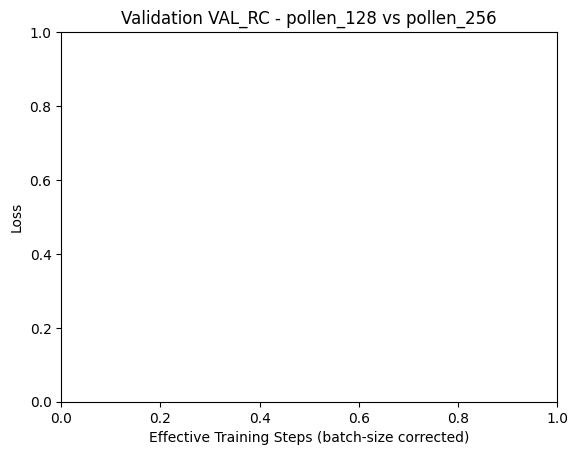

In [6]:
    # Plot-Eigenschaften setzen
    plt.xlabel("Effective Training Steps (batch-size corrected)")
    plt.ylabel("Loss" if metric != "psnr" else "PSNR")
    
    # Titel anpassen - PSNR ist auch eine Validierungsmetrik
    if metric.startswith("val_") or metric == "psnr":
        prefix = "Validation"
    else:
        prefix = "Training"
    
    plt.title(f"{prefix} {metric.upper()} - pollen_128 vs pollen_256")

In [ ]:
# Debug: Überprüfe verfügbare Metriken in pollen_128 und pollen_256
run_configs = {
    "pollen_128": {"run_id": "yeg9cl0o", "batch_size": 4},
    "pollen_256": {"run_id": "w3cbbmdm", "batch_size": 1},
}

target_runs = {}
for run in runs:
    for run_name, config in run_configs.items():
        if run.id == config["run_id"]:
            target_runs[run_name] = run

for run_name, run in target_runs.items():
    if run is not None:
        history = run.history(samples=100000)
        print(f"\\n=== {run_name} ===")
        print("Verfügbare Spalten:")
        print(sorted(history.columns.tolist()))

        # Suche nach PSNR-ähnlichen Metriken
        psnr_related = [col for col in history.columns if "psnr" in col.lower()]
        print(f"PSNR-verwandte Spalten: {psnr_related}")

        # Prüfe ob es Daten gibt
        for metric in ["t", "rf", "rc", "val_t", "val_rf", "val_rc"]:
            if metric in history.columns:
                non_nan_count = history[metric].notna().sum()
                total_count = len(history[metric])
                print(f"{metric}: {non_nan_count}/{total_count} gültige Werte")

        # Prüfe PSNR-Spalten
        for col in psnr_related:
            non_nan_count = history[col].notna().sum()
            total_count = len(history[col])
            print(f"{col}: {non_nan_count}/{total_count} gültige Werte")

\n=== pollen_128 ===
Verfügbare Spalten:
['_runtime', '_step', '_timestamp', 'alpha_reg', 'alpha_sparse_c', 'alpha_sparse_f', 'c_alpha_max', 'c_alpha_min', 'c_rgb_max', 'c_rgb_min', 'f_alpha_max', 'f_alpha_min', 'f_rgb_max', 'f_rgb_min', 'lr', 'psnr', 'rc', 'rf', 't', 'val_alpha_reg', 'val_alpha_sparse_c', 'val_alpha_sparse_f', 'val_rc', 'val_rf', 'val_t']
PSNR-verwandte Spalten: ['psnr']
t: 26031/26031 gültige Werte
rf: 26031/26031 gültige Werte
rc: 26031/26031 gültige Werte
val_t: 1447/26031 gültige Werte
val_rf: 1447/26031 gültige Werte
val_rc: 1447/26031 gültige Werte
psnr: 1447/26031 gültige Werte
\n=== pollen_256 ===
Verfügbare Spalten:
['_runtime', '_step', '_timestamp', 'alpha_reg', 'alpha_sparse_c', 'alpha_sparse_f', 'c_alpha_max', 'c_alpha_min', 'c_rgb_max', 'c_rgb_min', 'f_alpha_max', 'f_alpha_min', 'f_rgb_max', 'f_rgb_min', 'lr', 'psnr', 'rc', 'rf', 't', 'val_alpha_reg', 'val_alpha_sparse_c', 'val_alpha_sparse_f', 'val_rc', 'val_rf', 'val_t']
PSNR-verwandte Spalten: ['psnr'

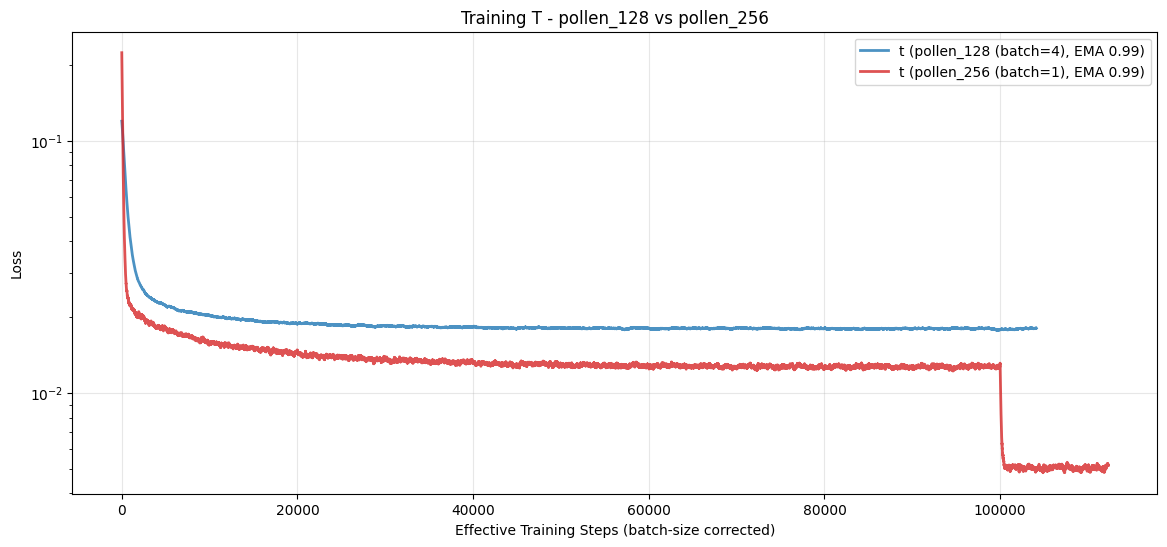

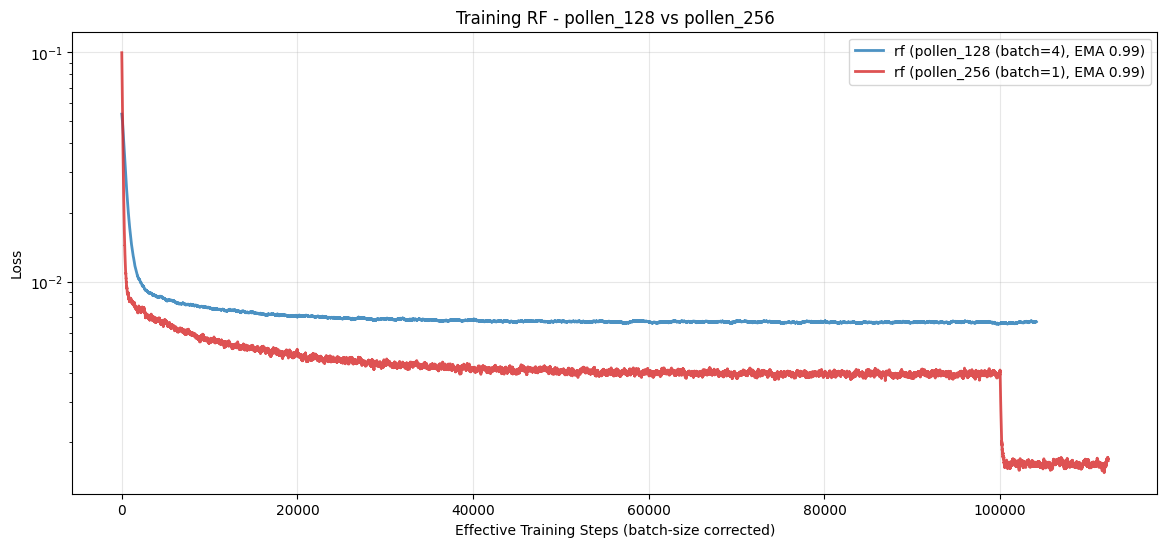

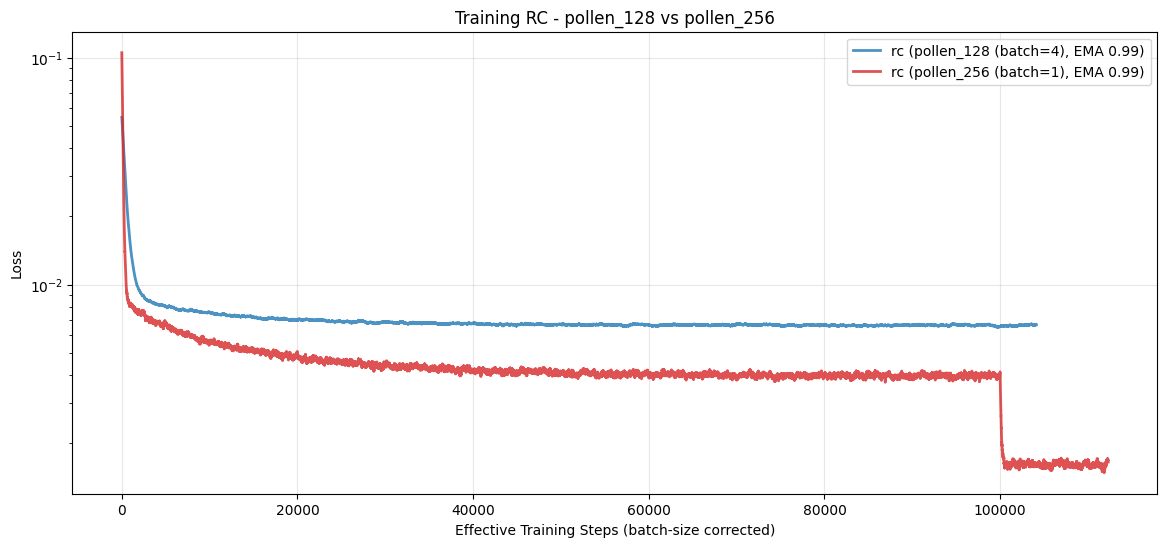

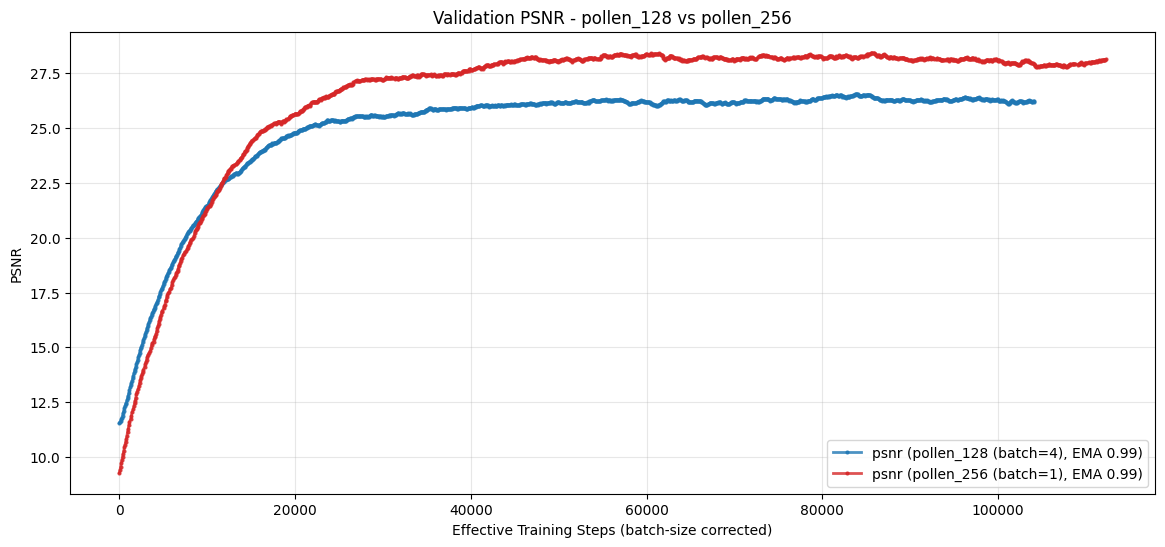

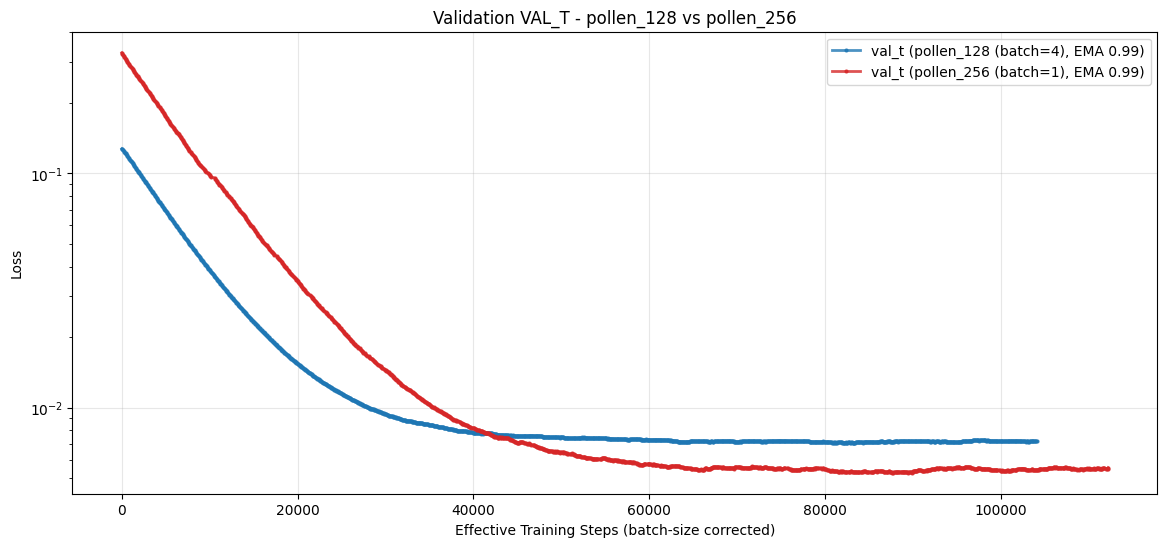

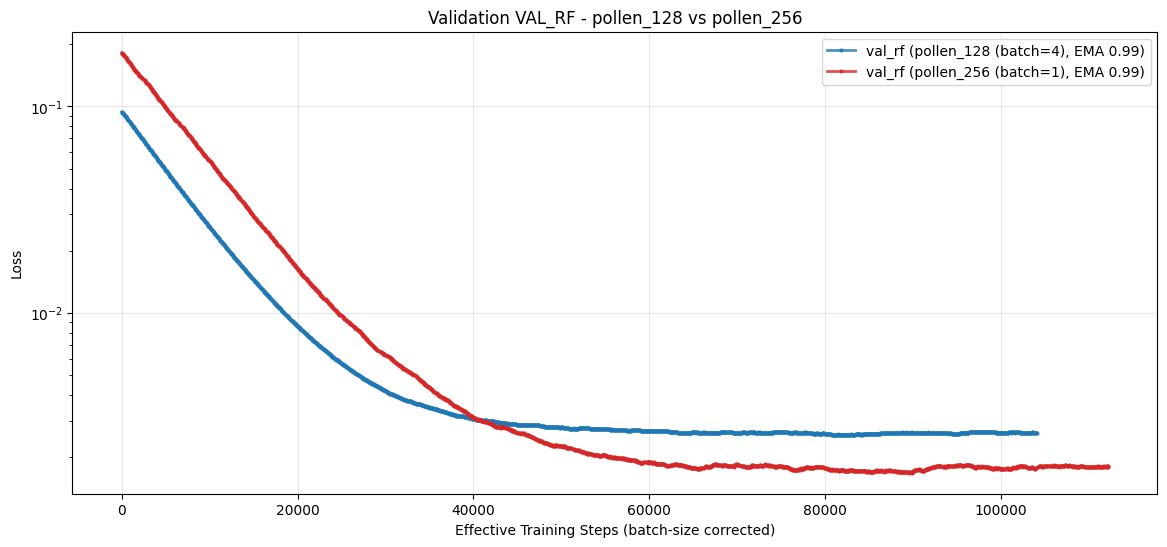

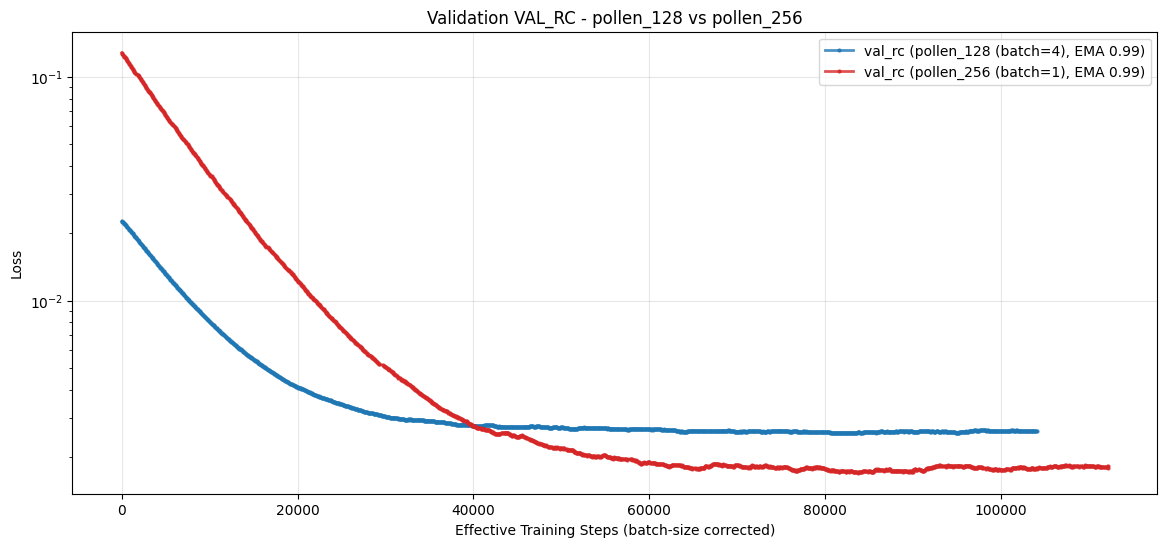

Alle Plots mit korrigierter PSNR-Behandlung erstellt!


In [7]:
# Korrigierte Plots: pollen_128 vs pollen_256 mit PSNR-Fix
def smooth_curve_ema(values, alpha=0.99):
    smoothed = []
    v = None
    for x in values:
        if v is None:
            v = x
        else:
            v = alpha * v + (1 - alpha) * x
        smoothed.append(v)
    return np.array(smoothed)


run_configs = {
    "pollen_128": {
        "run_id": "yeg9cl0o",
        "batch_size": 4,
        "color": "tab:blue",
        "label": "pollen_128 (batch=4)",
    },
    "pollen_256": {
        "run_id": "w3cbbmdm",
        "batch_size": 1,
        "color": "tab:red",
        "label": "pollen_256 (batch=1)",
    },
}

# Runs finden
target_runs = {}
for run in runs:
    for run_name, config in run_configs.items():
        if run.id == config["run_id"]:
            target_runs[run_name] = run

# Metriken plotten
metrics = ["t", "rf", "rc", "psnr", "val_t", "val_rf", "val_rc"]

for metric in metrics:
    plt.figure(figsize=(14, 6))

    for run_name, run in target_runs.items():
        if run is not None:
            history = run.history(samples=100000)
            config = run_configs[run_name]

            if metric in history.columns:
                # Batch-Size-Korrektur
                corrected_steps = history["_step"] * config["batch_size"]

                # PSNR und Validierungsmetriken: spärlich geloggt -> NaN filtern
                if metric.startswith("val_") or metric == "psnr":
                    valid_data = history[[metric]].dropna()
                    if not valid_data.empty:
                        valid_indices = valid_data.index
                        valid_steps = corrected_steps.iloc[valid_indices]

                        smoothed = smooth_curve_ema(
                            valid_data[metric].values, alpha=0.99
                        )
                        plt.plot(
                            valid_steps,
                            smoothed,
                            label=f"{metric} ({config['label']}, EMA 0.99)",
                            color=config["color"],
                            linewidth=2,
                            marker="o",
                            markersize=2,
                            alpha=0.8,
                        )
                else:
                    # Trainingsmetriken: alle Werte verwenden
                    smoothed = smooth_curve_ema(history[metric].values, alpha=0.99)
                    plt.plot(
                        corrected_steps,
                        smoothed,
                        label=f"{metric} ({config['label']}, EMA 0.99)",
                        color=config["color"],
                        linewidth=2,
                        alpha=0.8,
                    )

    # Plot konfigurieren
    plt.xlabel("Effective Training Steps (batch-size corrected)")
    plt.ylabel("Loss" if metric != "psnr" else "PSNR")

    # Titel
    if metric.startswith("val_") or metric == "psnr":
        prefix = "Validation"
    else:
        prefix = "Training"
    plt.title(f"{prefix} {metric.upper()} - pollen_128 vs pollen_256")

    # Skalierung
    if metric != "psnr":
        plt.yscale("log")

    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

print("Alle Plots mit korrigierter PSNR-Behandlung erstellt!")

Suche nach Runs...
Gefunden: pollen_augmentation2 (ID: vobq6rqk)
Gefunden: pollen_l1 (ID: 4c073lem)
Gefunden: pollen_softplus (ID: vipqvh5l)
Gefunden: pollen_augmentation_no_global (ID: z1pjgeol)
Gefunden: pollen_more_fine_coarse (ID: r1s5mfu0)
Gefundene Runs: ['pollen_augmentation2', 'pollen_l1', 'pollen_softplus', 'pollen_augmentation_no_global', 'pollen_more_fine_coarse']


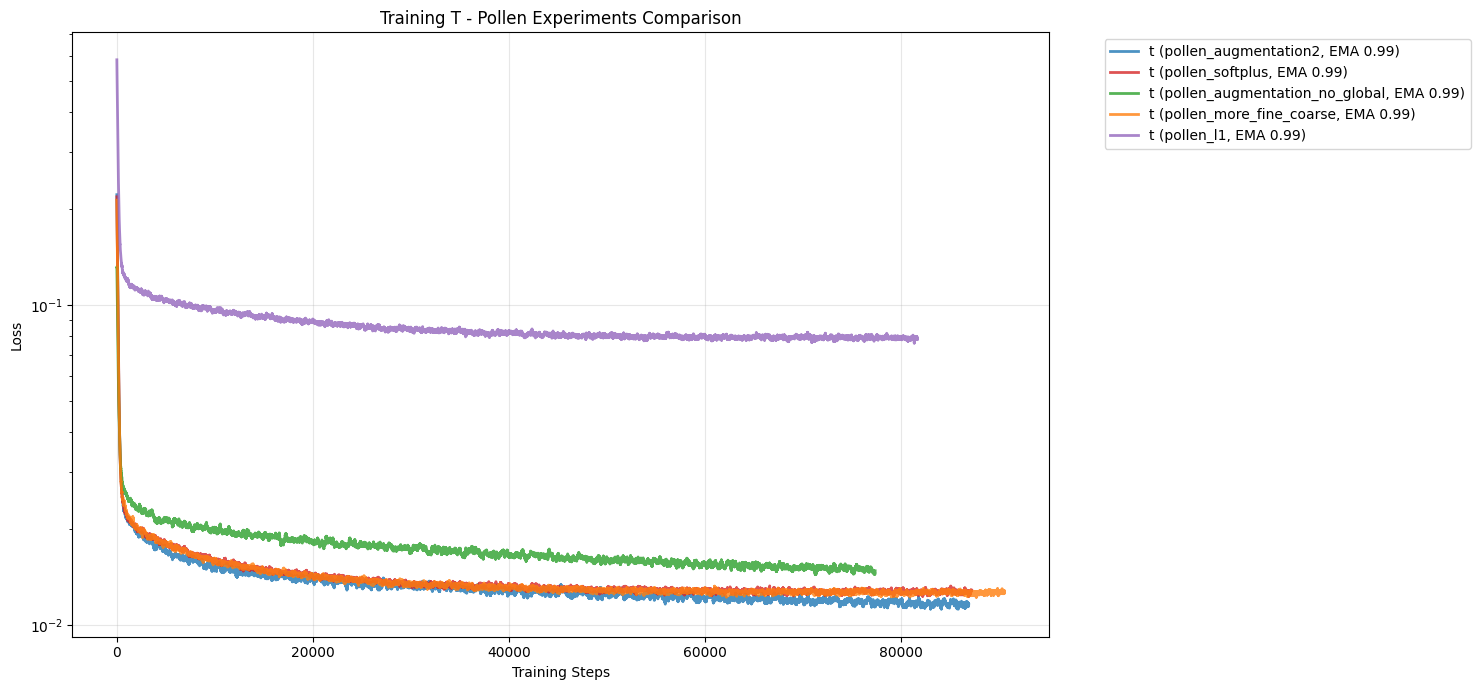

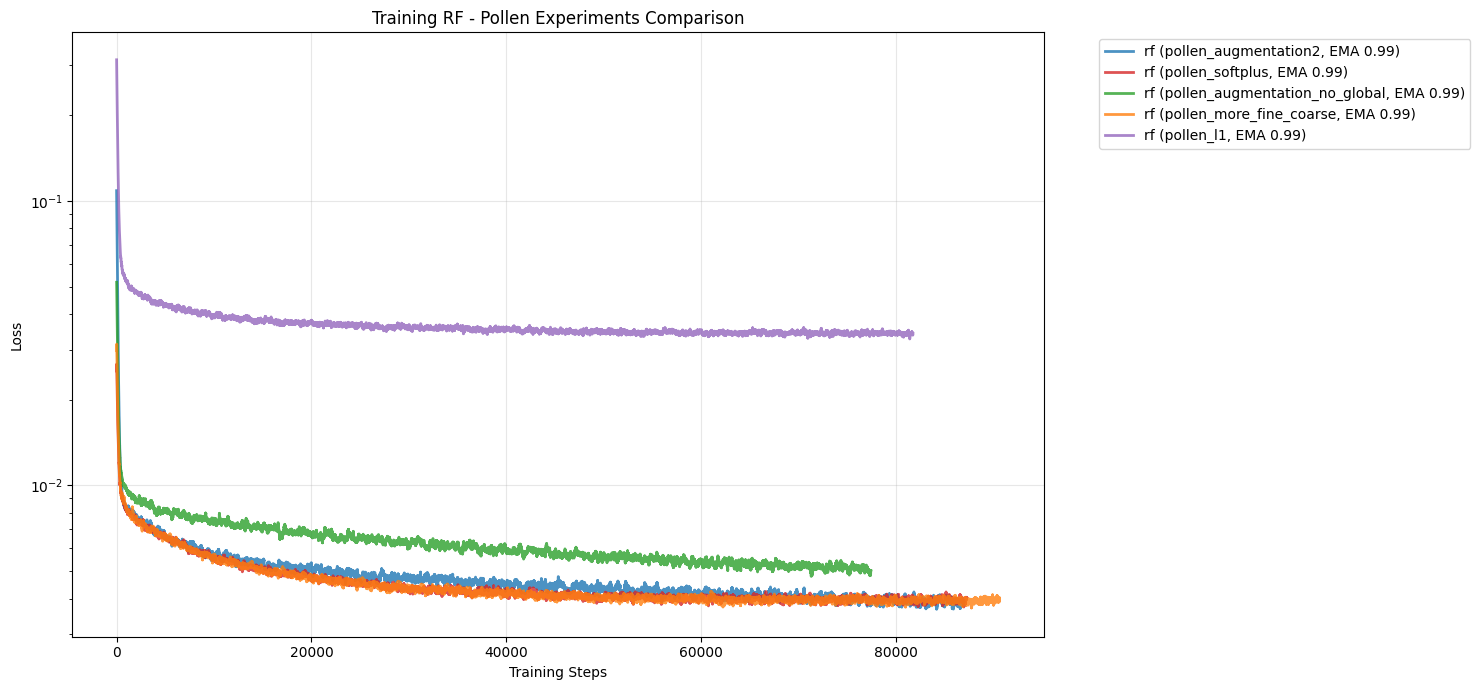

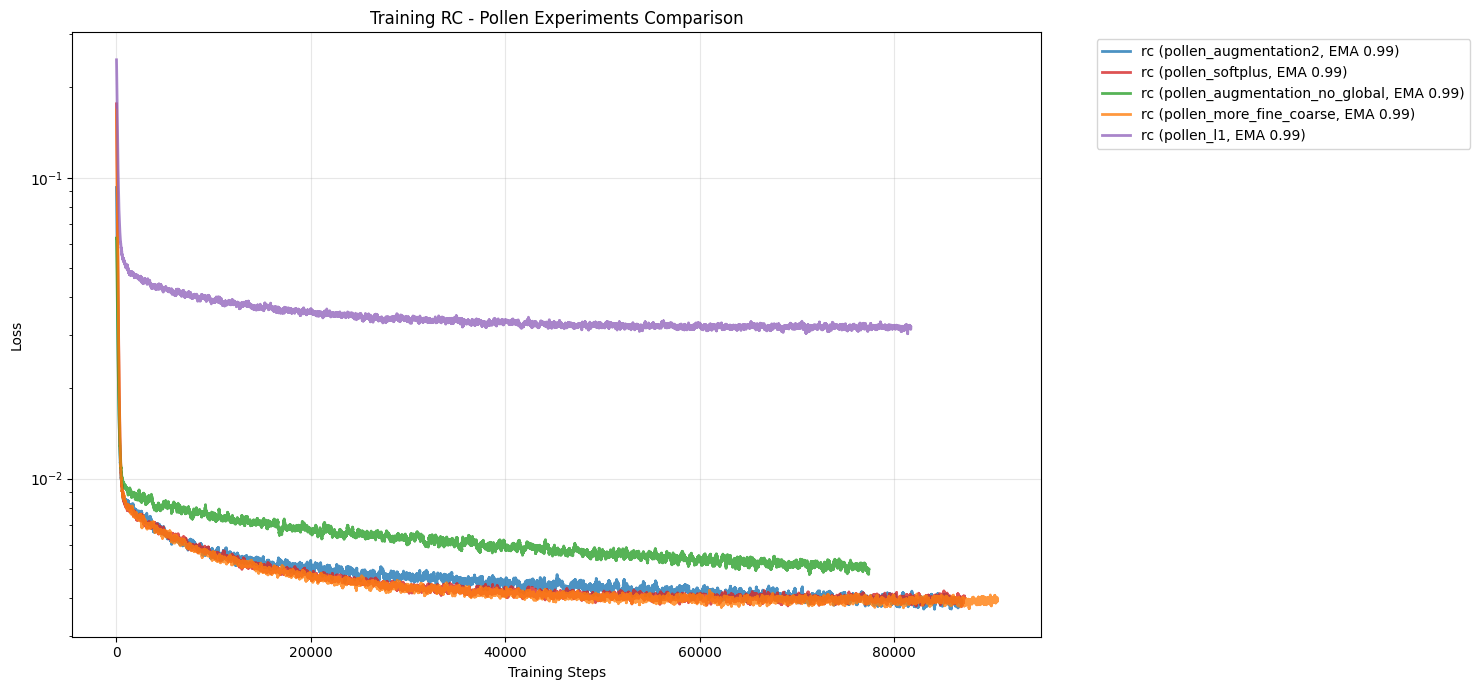

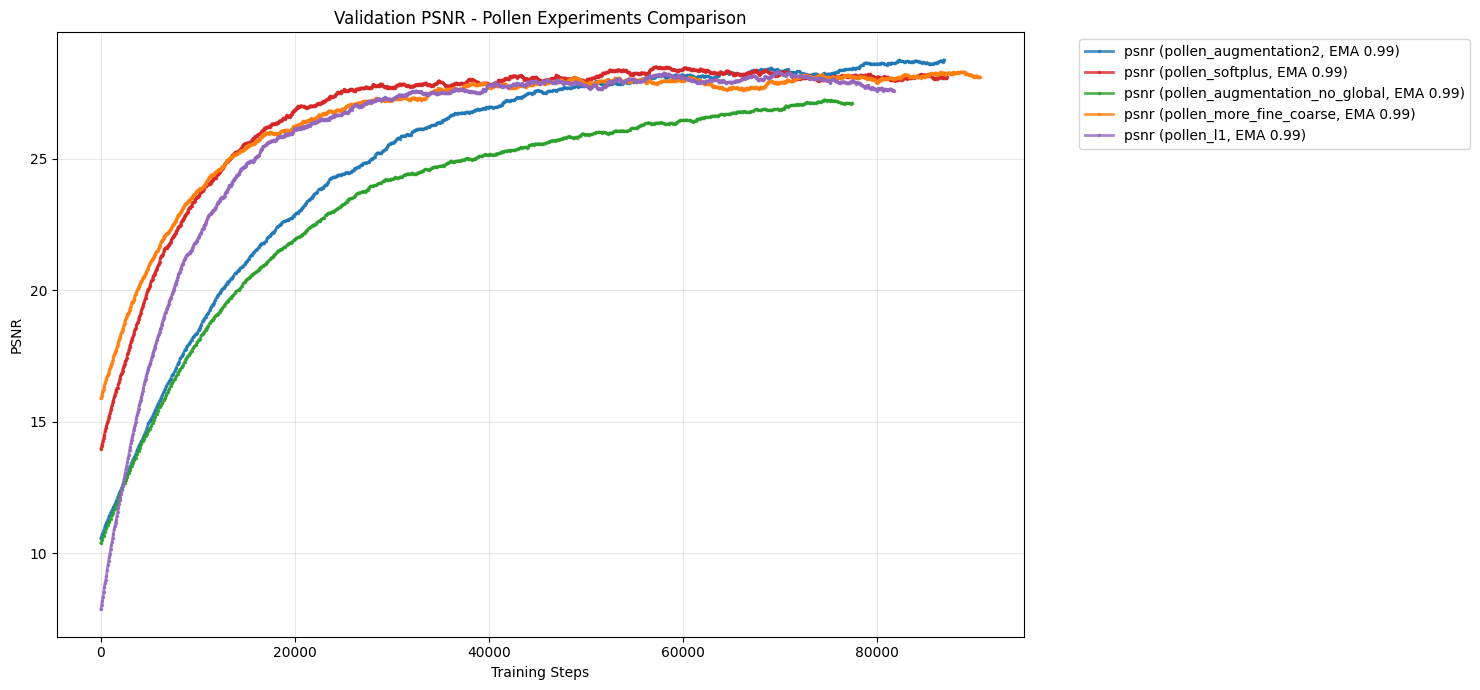

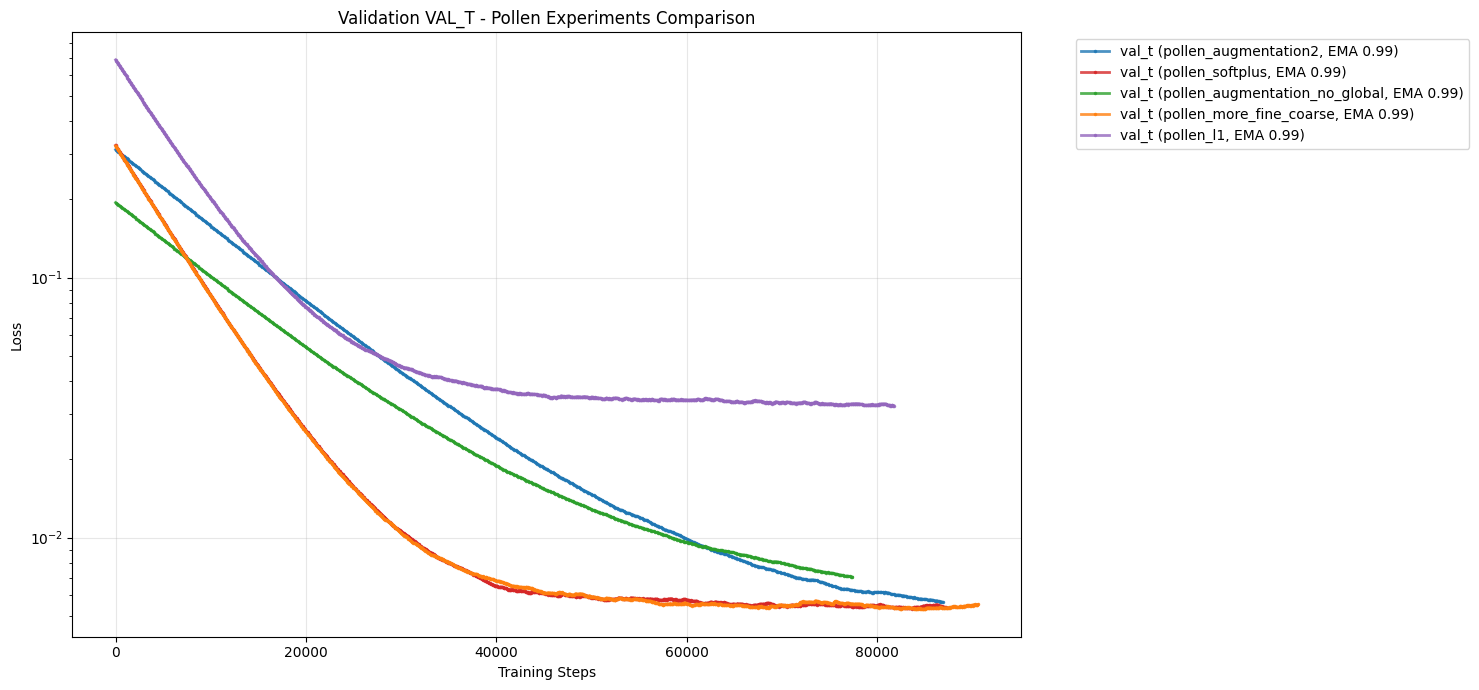

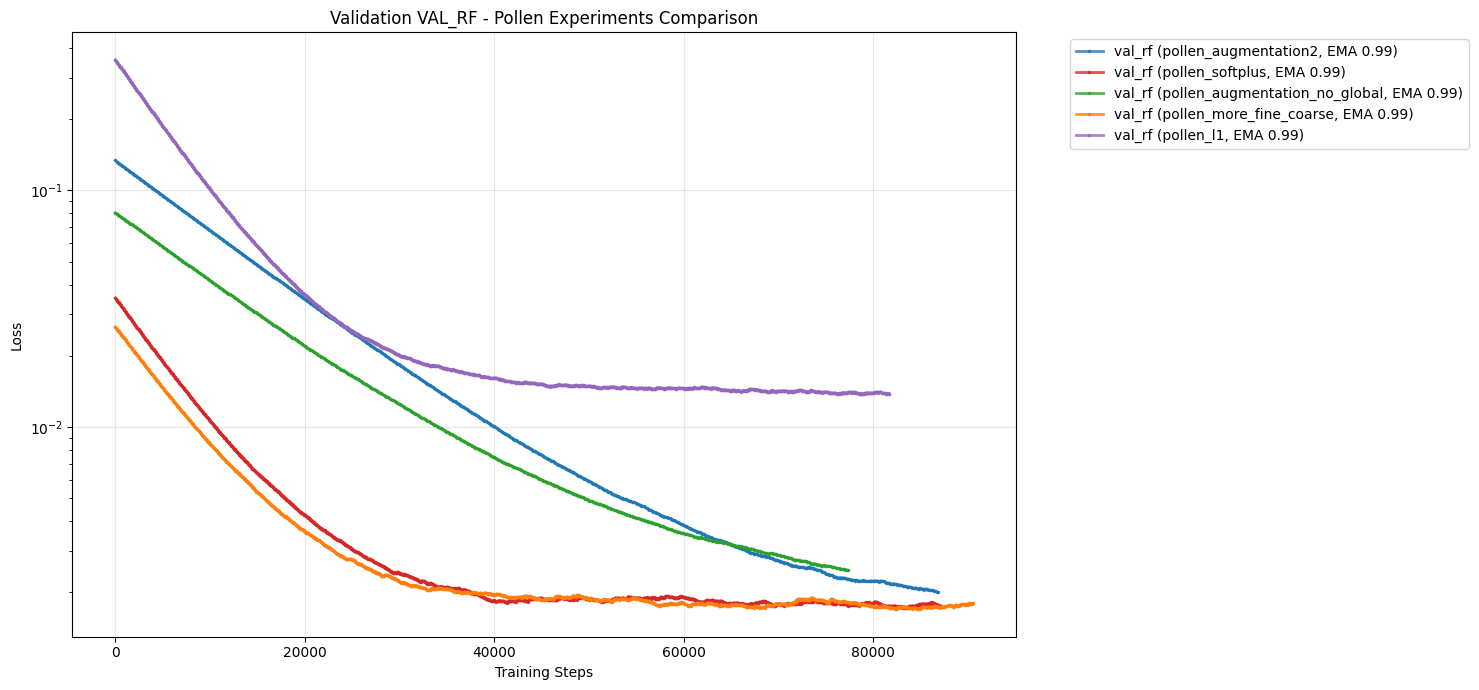

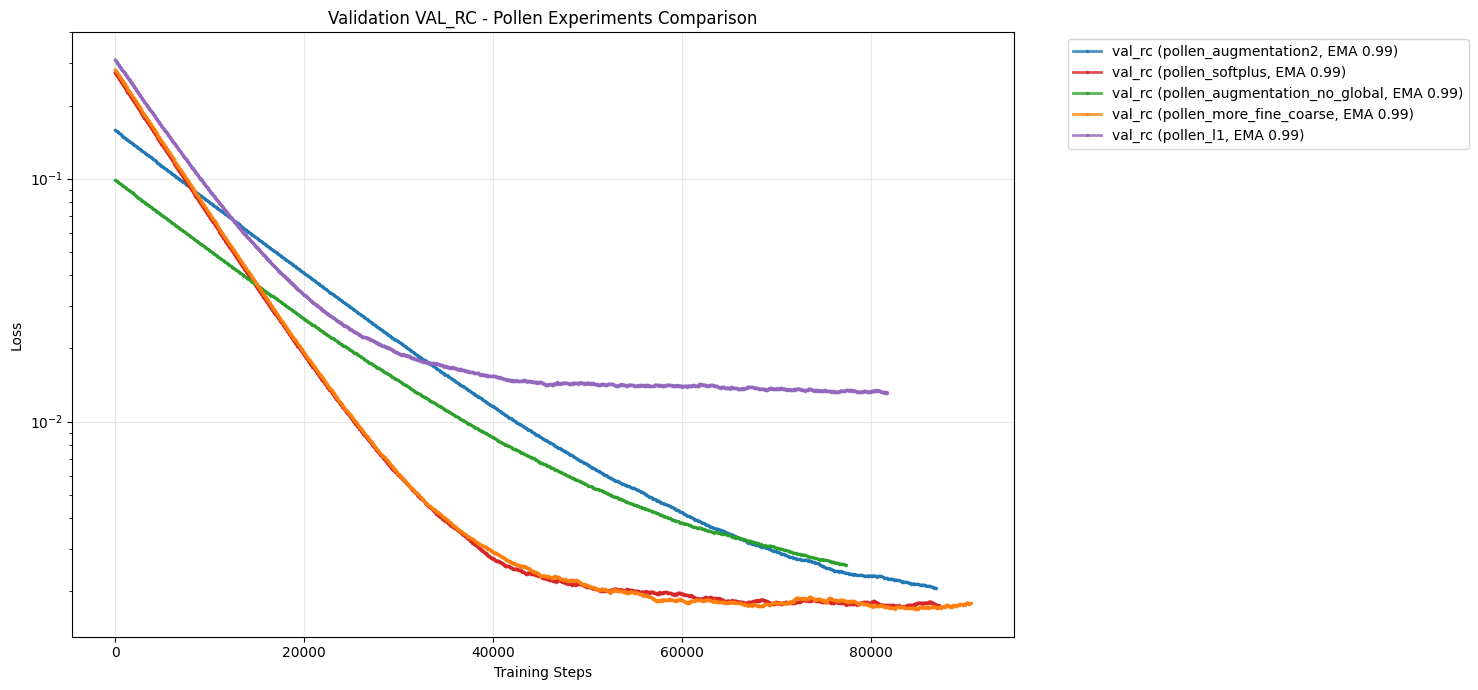

Alle Vergleichsplots erstellt!


In [ ]:
# Vergleich verschiedener pollen Experimente
def smooth_curve_ema(values, alpha=0.99):
    smoothed = []
    v = None
    for x in values:
        if v is None:
            v = x
        else:
            v = alpha * v + (1 - alpha) * x
        smoothed.append(v)
    return np.array(smoothed)


# Run-Namen die gesucht werden sollen
target_run_names = [
    "pollen_augmentation2",
    "pollen_softplus",
    "pollen_augmentation_no_global",
    "pollen_more_fine_coarse",
    "pollen_l1",
]

# Farben für die verschiedenen Runs
colors = ["tab:blue", "tab:red", "tab:green", "tab:orange", "tab:purple"]

# Runs finden
found_runs = {}
print("Suche nach Runs...")
for run in runs:
    if run.name in target_run_names:
        found_runs[run.name] = run
        print(f"Gefunden: {run.name} (ID: {run.id})")

print(f"Gefundene Runs: {list(found_runs.keys())}")

# Metriken die geplottet werden sollen
metrics = ["t", "rf", "rc", "psnr", "val_t", "val_rf", "val_rc"]

for metric in metrics:
    plt.figure(figsize=(15, 7))

    for idx, run_name in enumerate(target_run_names):
        if run_name in found_runs:
            run = found_runs[run_name]
            history = run.history(samples=100000)

            if metric in history.columns:
                # Für PSNR und Validierungsmetriken: NaN filtern
                if metric.startswith("val_") or metric == "psnr":
                    valid_data = history[["_step", metric]].dropna()
                    if not valid_data.empty:
                        smoothed = smooth_curve_ema(
                            valid_data[metric].values, alpha=0.99
                        )
                        plt.plot(
                            valid_data["_step"],
                            smoothed,
                            label=f"{metric} ({run_name}, EMA 0.99)",
                            color=colors[idx],
                            linewidth=2,
                            marker="o",
                            markersize=1.5,
                            alpha=0.8,
                        )
                else:
                    # Für Trainingsmetriken: alle Werte
                    smoothed = smooth_curve_ema(history[metric].values, alpha=0.99)
                    plt.plot(
                        history["_step"],
                        smoothed,
                        label=f"{metric} ({run_name}, EMA 0.99)",
                        color=colors[idx],
                        linewidth=2,
                        alpha=0.8,
                    )

    # Plot konfigurieren
    plt.xlabel("Training Steps")
    plt.ylabel("Loss" if metric != "psnr" else "PSNR")

    # Titel
    if metric.startswith("val_") or metric == "psnr":
        prefix = "Validation"
    else:
        prefix = "Training"
    plt.title(f"{prefix} {metric.upper()} - Pollen Experiments Comparison")

    # Skalierung
    if metric != "psnr":
        plt.yscale("log")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("Alle Vergleichsplots erstellt!")